In [ ]:
import pandas as pd
data=pd.read_csv('movies.csv')
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data.shape

(9742, 3)

In [ ]:
import pandas as pd
data=pd.read_csv('ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
data.shape

(100836, 4)

In [ ]:
data['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
unique_user_count = ratings['userId'].nunique()
print(unique_user_count)


610


In [ ]:

rating_counts = ratings['movieId'].value_counts()

most_rated_movie_id = rating_counts.idxmax()
max_ratings = rating_counts.max()

print(f"Movie ID with the maximum number of ratings: {most_rated_movie_id}")
print(f"Number of ratings received: {max_ratings}")

movies = pd.read_csv('movies.csv')
most_rated_movie_title = movies.loc[movies['movieId'] == most_rated_movie_id, 'title'].values[0]

print(f"Movie with the maximum number of user ratings: {most_rated_movie_title}")


Movie ID with the maximum number of ratings: 356
Number of ratings received: 329
Movie with the maximum number of user ratings: Forrest Gump (1994)


In [ ]:
movies = pd.read_csv('movies.csv')
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

print(f"Movie ID for 'Matrix, The (1999)': {matrix_movie_id}")
tags = pd.read_csv('tags.csv')

matrix_tags = tags[tags['movieId'] == matrix_movie_id]

unique_matrix_tags = matrix_tags['tag'].unique()
print(f"Tags submitted for 'Matrix, The (1999)': {unique_matrix_tags}")


Movie ID for 'Matrix, The (1999)': 2571
Tags submitted for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [ ]:
terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
print(f"Movie ID for 'Terminator 2: Judgment Day (1991)': {terminator_movie_id}")
ratings = pd.read_csv('ratings.csv')

terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]
average_rating = terminator_ratings['rating'].mean()

print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")


Movie ID for 'Terminator 2: Judgment Day (1991)': 589
Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


Movie ID for 'Fight Club (1999)': 2959


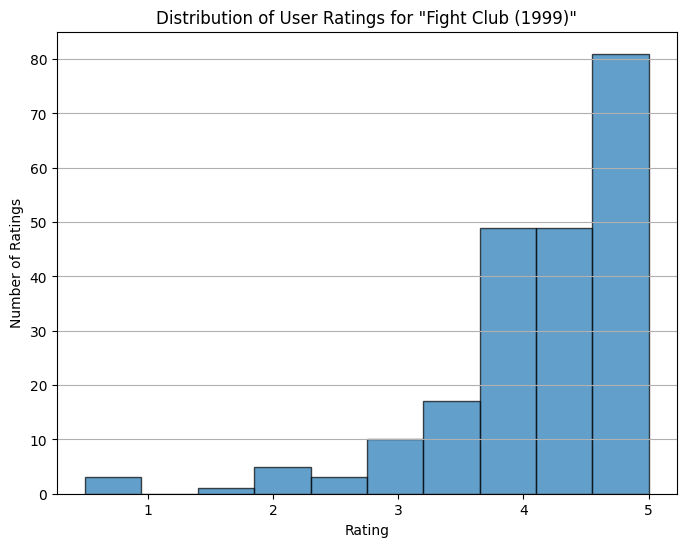

In [ ]:
import matplotlib.pyplot as plt

fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

print(f"Movie ID for 'Fight Club (1999)': {fight_club_movie_id}")
ratings = pd.read_csv('ratings.csv')

fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(axis='y')
plt.show()


In [ ]:
movies_path = 'movies.csv'
movies_df = pd.read_csv(movies_path)

ratings_path = 'ratings.csv'
ratings_df = pd.read_csv(ratings_path)

grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['rating_count'] > 50]

filtered_movies.head(), filtered_movies.shape


(   movieId                    title  \
 0        1         Toy Story (1995)   
 1        2           Jumanji (1995)   
 2        3  Grumpier Old Men (1995)   
 5        6              Heat (1995)   
 6        7           Sabrina (1995)   
 
                                         genres  rating_count  rating_mean  
 0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
 1                   Adventure|Children|Fantasy           110     3.431818  
 2                               Comedy|Romance            52     3.259615  
 5                        Action|Crime|Thriller           102     3.946078  
 6                               Comedy|Romance            54     3.185185  ,
 (436, 5))

In [ ]:
movies_path = 'movies.csv'
movies_df = pd.read_csv(movies_path)
ratings_path = 'ratings.csv'
ratings_df = pd.read_csv(ratings_path)

grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['rating_count'] > 50]
filtered_movies_path = 'filtered_movies.csv'
filtered_movies.to_csv(filtered_movies_path, index=False)
print(f'Successfully saved filtered movies data to {filtered_movies_path}')


Successfully saved filtered movies data to filtered_movies.csv


In [ ]:
movies_path = 'movies.csv'
ratings_path = 'ratings.csv'

movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)

grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')


filtered_movies = merged_df[merged_df['rating_count'] > 50]

most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]
most_popular_movie[['title', 'rating_mean']]


,277
title,"Shawshank Redemption, The (1994)"
rating_mean,4.429022


In [ ]:
movies_path = 'movies.csv'
ratings_path = 'ratings.csv'
movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)

grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['rating_count'] > 50]
top_5_movies = filtered_movies.nlargest(5, 'rating_count')
top_5_movies[['title', 'rating_count']]


,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [ ]:
movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['rating_count'] > 50]
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
top_sci_fi_movies = sci_fi_movies.nlargest(3, 'rating_count')
third_most_popular_sci_fi = top_sci_fi_movies.iloc[2]

third_most_popular_sci_fi[['title', 'rating_count']]


,418
title,Jurassic Park (1993)
rating_count,238


In [43]:
movies_path = 'movies.csv'
movies_df = pd.read_csv(movies_path)

ratings_path = 'ratings.csv'
ratings_df = pd.read_csv(ratings_path)

grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['rating_count'] > 50]

filtered_movies.head(), filtered_movies.shape


(   movieId                    title  \
 0        1         Toy Story (1995)   
 1        2           Jumanji (1995)   
 2        3  Grumpier Old Men (1995)   
 5        6              Heat (1995)   
 6        7           Sabrina (1995)   
 
                                         genres  rating_count  rating_mean  
 0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
 1                   Adventure|Children|Fantasy           110     3.431818  
 2                               Comedy|Romance            52     3.259615  
 5                        Action|Crime|Thriller           102     3.946078  
 6                               Comedy|Romance            54     3.185185  ,
 (436, 5))

In [44]:

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    print(f"Scraping URL: {URL}") # Debugging output

    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    response = requests.get(URL, headers=request_header)

    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})

    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan

In [45]:
import pandas as pd


a=pd.read_csv("filltered movies.csv")
import nest_asyncio
nest_asyncio.apply()

import aiohttp
import asyncio
from bs4 import BeautifulSoup
from tqdm import tqdm

async def fetch_imdb_rating(session, imdb_id):
    id = str(int(imdb_id))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    url = f"https://www.imdb.com/title/tt{new_id}/"
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    retries = 30
    for attempt in range(retries):
        try:
            async with session.get(url, headers=headers) as response:
                if response.status == 200:
                    html_content = await response.text()
                    soup = BeautifulSoup(html_content, 'html.parser')
                    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
                    return imdb_rating.text if imdb_rating else None
                else:
                    return None
        except aiohttp.ClientConnectionError:
            print(f"Attempt {attempt + 1}/{retries}: Connection error. Retrying...")
            await asyncio.sleep(2)

    return None

async def loop_data_async(imdb_ids):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_imdb_rating(session, imdb_id) for imdb_id in imdb_ids]
        imdb_ratings = await asyncio.gather(*tasks)
        return imdb_ratings

def loop_data():
    imdb_ids = a["imdbId"]
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)
    try:
        return loop.run_until_complete(loop_data_async(imdb_ids))
    finally:
        loop.close()
a["Imdb_ratings"]= loop_data()

a.head()

,Unnamed: 0,movieId,imdbId,tmdbId,Imdb_ratings
0,0,1,114709,862.0,8.3
1,1,2,113497,8844.0,7.1
2,2,3,113228,15602.0,6.7
3,5,6,113277,949.0,8.3
4,6,7,114319,11860.0,6.3


In [46]:
max_rating = a["Imdb_ratings"].max()
max_rating

'9.3'

In [47]:
highest_rated_movie = a[a["Imdb_ratings"] == max_rating]
highest_movie_ids = highest_rated_movie['movieId'].tolist()
highest_movie_ids

[318]

In [ ]:
import pandas as pd
movies=pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
df = movies

df['genres'] = df['genres'].str.split('|')
df_exploded = df.explode('genres').reset_index(drop=True)


df_exploded

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy
22080,193585,Flint (2017),Drama
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [ ]:
sci_movie=df_exploded[df_exploded['genres']=='Sci-Fi']
sci_movie

,movieId,title,genres
60,24,Powder (1995),Sci-Fi
72,29,"City of Lost Children, The (Cité des enfants p...",Sci-Fi
77,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Sci-Fi
138,66,Lawnmower Man 2: Beyond Cyberspace (1996),Sci-Fi
157,76,Screamers (1995),Sci-Fi
...,...,...,...
22027,188301,Ant-Man and the Wasp (2018),Sci-Fi
22046,189547,Iron Soldier (2010),Sci-Fi
22050,190183,The Darkest Minds (2018),Sci-Fi
22062,191005,Gintama (2017),Sci-Fi


In [ ]:
sci_movies=sci_movie['movieId'].tolist()

In [37]:
sci_movies=set(sci_movies)


In [ ]:
links=pd.read_csv('links.csv')

In [ ]:
movie=links[links['movieId'].isin(sci_movies)]

In [ ]:
movie.to_csv('SCI-FI.csv')

In [ ]:

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    print(f"Scraping URL: {URL}") # Debugging output

    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    response = requests.get(URL, headers=request_header)

    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})

    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan

In [32]:
import pandas as pd


a=pd.read_csv("SCI-FI.csv")
import nest_asyncio
nest_asyncio.apply()

import aiohttp
import asyncio
from bs4 import BeautifulSoup
from tqdm import tqdm

async def fetch_imdb_rating(session, imdb_id):
    id = str(int(imdb_id))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    url = f"https://www.imdb.com/title/tt{new_id}/"
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    retries = 30
    for attempt in range(retries):
        try:
            async with session.get(url, headers=headers) as response:
                if response.status == 200:
                    html_content = await response.text()
                    soup = BeautifulSoup(html_content, 'html.parser')
                    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
                    return imdb_rating.text if imdb_rating else None
                else:
                    return None
        except aiohttp.ClientConnectionError:
            print(f"Attempt {attempt + 1}/{retries}: Connection error. Retrying...")
            await asyncio.sleep(2)

    return None

async def loop_data_async(imdb_ids):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_imdb_rating(session, imdb_id) for imdb_id in imdb_ids]
        imdb_ratings = await asyncio.gather(*tasks)
        return imdb_ratings

def loop_data():
    imdb_ids = a["imdbId"]
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)
    try:
        return loop.run_until_complete(loop_data_async(imdb_ids))
    finally:
        loop.close()
a["Imdb_ratings"]= loop_data()

a.head()

,Unnamed: 0,movieId,imdbId,tmdbId,Imdb_ratings
0,23,24,114168,12665.0,6.6
1,28,29,112682,902.0,7.5
2,31,32,114746,63.0,8.0
3,59,66,116839,11525.0,2.6
4,68,76,114367,9102.0,6.3


In [34]:

max_rating = a["Imdb_ratings"].max()
max_rating

'9.3'

In [35]:
highest_rated_movie = a[a["Imdb_ratings"] == max_rating]
highest_movie_ids = highest_rated_movie['movieId'].tolist()

In [36]:
highest_movie_ids

[106642]